### 회귀분석

주어진 독립변수(X)를 활용하여 종속변수(Y)를 예측하는 기법   
데이터의 분포를 그래프에 나타내면, 각 독립변수(X)와 종속변수(Y)간의 관계를 가장 잘 설명하는 직선을 찾는 것이 핵심   

예측이 가능한 이유    
주어진 데이터에서 독립변수들의 평균값을 사용하여 종속 변수를 추정   

회귀선의 개념   
회귀선은 종속변수의 값에 영향을 주는 독립변수들의 조건을 고려하여 평균값을 예측하는 선    

최적의 회귀선 찾기(최소제곱추정법, LSE)   
최적의 회귀선이란 각 데이터 포인트와 회귀선 간의 차이를 최소화하는 선이다.    
즉, 예측값과 실제값 간의 오차가 가장 작은 선이다.   
최소제곱추정법은 회귀선과 각 데이터 점간의 거리의 제곱합을 최소화하는 방법이다.   

단순 회귀분석과 다중 회귀분석   
단순 회귀분석은 독립변수(X)가 하나인 회귀분석이다.    
다중 회귀분석은 독립변수가 두 개 이상인 회귀분석이다.   

다중공선성 문제와 해결 방법   
다중공선성은 독립변수들끼리 강한 상관관계를 가질 경우 발생한다.   
모델의 신뢰성이 저하되기 때문에 해결해야 한다.    
다중공선성 해결 방법    
VIF 값 확인 -> VIF 값이 5 이상이면 다중공선성 의심, 10 이상이면 심각    
상관분석 활용 -> 독립변수들 간의 피어슨 상관계수 확인   
차원축소(PCA) -> 상관성이 높은 변수들을 줄이는 방법   
불필요한 변수 제거    

회귀분석의 4가지 기본 가정    
1. 잔차의 정규성   
잔차 = 관측값 - 예측값    
잔차가 정규분포를 따라야 회귀모델이 적절함을 의미   
검증 방법 : 히스토그램이 정규분포 모양을 띄는지 확인, p-value > 0.05이면 정규성 만족    

2. 잔차의 등분산성    
잔차의 분산이 일정해야 함.    

3. 독립성   
독립변수들 간에 강한 상관관계가 없어야 함.    

4. 선형성   
X값이 증가하면 종속변수도 일정하게 증가/감소해야 함.    

### 다항 회귀   
다항 회귀는 독립변수(X)와 종속변수(Y)의 관계가 선형이 아닐 때 사용하는 회귀 방법    
독립변수 X를 여러 차수로 변환하여 곡선 형태의 회귀선을 생성   

다항 회귀의 문제점    
과적합 위험: 차수를 증가시키면 훈련 데이터에는 잘 맞지만, 새로운 데이터에는 성능이 저하됨   
해결책: 규제 기법 적용    
변수 간 다중공선성 문제: x, x^2, x^3 등이 포함되면서 독립변수 간 상관관계가 증가 -> 모델 불안정   
해결책: 변수 선택 알고리즘 사용   

규제 기법: Ridge, Lasso, Elastic Net

Ridge Regression(L2 규제)   
계수의 크기를 작게 유지하여 과적합 방지   
모든 변수를 유지하면서 가중치를 작게 만듦.    

Lasso Regression(L1 규제)    
불필요한 변수를 자동 제거하여 모델 단순화   
회귀계수를 0으로 만들 수 있다.    

Elastic Net(Ridge+Lasso 결합)   
L1 + L2 규제 동시 적용    
다중공선성 해결 + 변수 선택 기능 제공   


In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("harlfoxem/housesalesprediction")

print("Path to dataset files:", path)

100%|██████████| 780k/780k [00:00<00:00, 1.19MB/s]

Extracting files...
Path to dataset files: C:\Users\KimDongyoung\.cache\kagglehub\datasets\harlfoxem\housesalesprediction\versions\1


In [2]:
# 필요한 패키지 설치

import pandas as pd # csv file 
import numpy as np
from sklearn.linear_model import LinearRegression # 선형회귀모델 생성 
from sklearn.model_selection import train_test_split # train/test set 생성 
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error # MSE : 평균제곱오차 - model 평가 
from sklearn import datasets # sklearn 기본 데이터셋 load
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
# 데이터 불러오기
# https://www.kaggle.com/datasets/harlfoxem/housesalesprediction
df = pd.read_csv("C:/Users/KimDongyoung/.cache/kagglehub/datasets/harlfoxem/housesalesprediction/versions/1/kc_house_data.csv")

# 데이터 샘플 확인
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

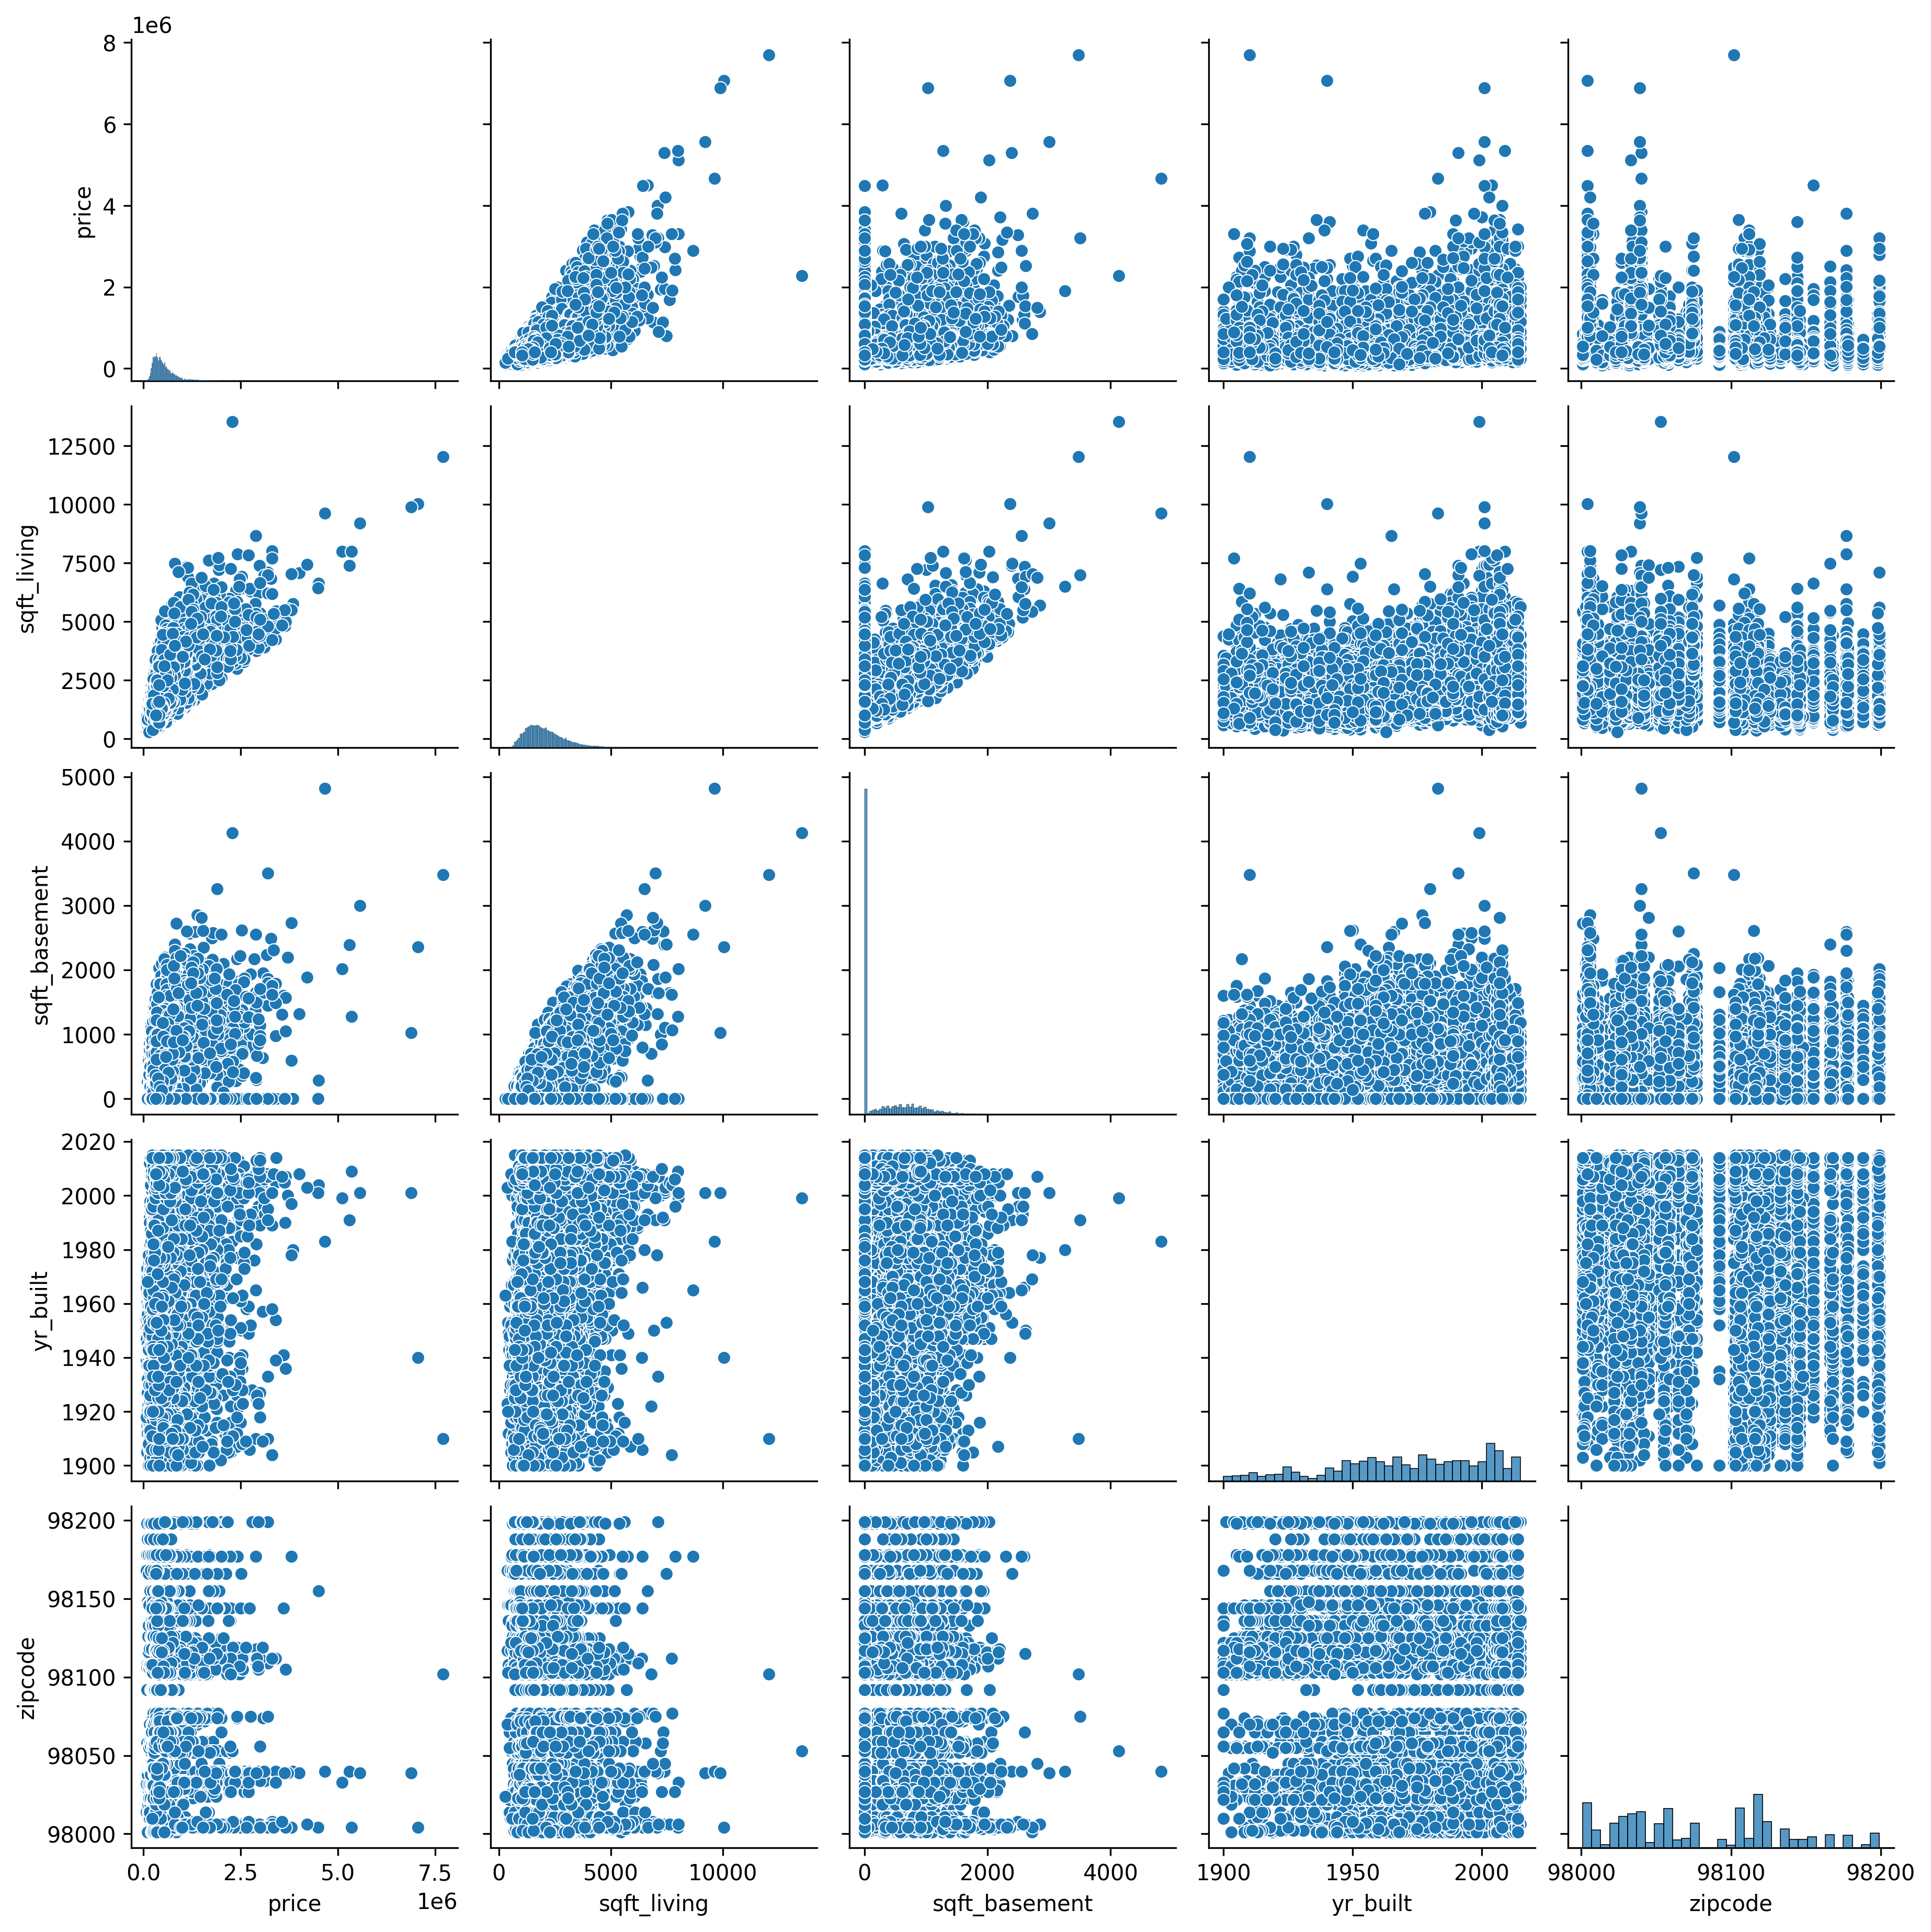

In [5]:
# 데이터 시각화 하여 분포 확인하기

import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 300

sns.pairplot(df[["price", "sqft_living", "sqft_basement", "yr_built", "zipcode"]])
plt.show()

In [6]:
# 변수 선택 및 컬럼명 붙여넣기 위한 컬럼 리스트 생성
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [7]:
# 독립변수와 종속변수 분리하여 생성
x = df[[ 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15']]
# 'id', 'date'는 키값에 해당하므로 변수에서 제외 해준다.
y = df[['price']]

# 학습셋과 테스트셋 분리하여 생성(7:3)
# df_train, df_test = train_test_split(df, test_size = 0.3) 
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, test_size=0.3)

In [8]:
# 다중회귀모델 생성
mreg = LinearRegression(fit_intercept=True)
mreg.fit(x_train, y_train) 
# 앞서 설치했던 sklearn의 LinearRegression을 학습데이터에 적용 해준다. 학습 데이터를 통해 price를 예측할 수 있는 회귀계수가 생성된다. 
# fit_intercept 인수는 모형에 상수항을 넣을지 말지를 설정해 주는 명령어다. 기본 값은 True라서 상수항을 빼지 않을 거라면, 생략해도 된다.

LinearRegression()

In [9]:
# 테스트셋에 모델 적용
y_predict = mreg.predict(x_test)

In [10]:
print("학습셋 R-Square: {:.2f}".format(mreg.score(x_train, y_train)))
print("테스트셋 R-Square: {:.2f}".format(mreg.score(x_test, y_test)))

학습셋 R-Square: 0.71
테스트셋 R-Square: 0.67


In [11]:
# 모델의 상수값 확인
print(mreg.intercept_)

# 모델의 회귀계수 확인
print(mreg.coef_)

[6800312.82386847]
[[-3.40371454e+04  3.91960990e+04  9.98798174e+01  2.30899772e-01
   1.18563910e+04  6.01905270e+05  5.30418902e+04  2.82009586e+04
   1.00885724e+05  5.97551216e+01  4.01246953e+01 -2.57125264e+03
   2.05950146e+01 -5.81160306e+02  5.82451172e+05 -2.19635904e+05
   3.26093800e+01 -4.66496965e-01]]


In [12]:
ols_m = sm.OLS(y_train, sm.add_constant(x_train)).fit()
ols_m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.714
Model:                            OLS   Adj. R-squared:                  0.714
Method:                 Least Squares   F-statistic:                     2220.
Date:                Wed, 07 May 2025   Prob (F-statistic):               0.00
Time:                        09:57:58   Log-Likelihood:            -2.0539e+05
No. Observations:               15129   AIC:                         4.108e+05
Df Residuals:                   15111   BIC:                         4.110e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            6.8e+06   3.33e+06      2.043      0.041    2.77e+05    1.33e+07
bedrooms      -3.404e+04   2227.435    -15.281      0.000   -3.84e+04   -2.97e+04
bathrooms       3.92e+04   3667.951     10.686      0.000     3.2e+04    4.64e+04
sqft_living      99.8798      2.609     38.284      0.000      94.766     104.994
sqft_lot          0.2309      0.053      4.322      0.000       0.126       0.336
floors         1.186e+04   4047.994      2.929      0.003    3921.833    1.98e+04
waterfront     6.019e+05      2e+04     30.038      0.000    5.63e+05    6.41e+05
view           5.304e+04   2391.909     22.176      0.000    4.84e+04    5.77e+04
condition       2.82e+04   2665.157     10.581      0.000     2.3e+04    3.34e+04
grade          1.009e+05   2438.450     41.373      0.000    9.61e+04    1.06e+05
sqft_above       59.7551      2.555     23.391      0.000      54.748      64.763
sqft_basement    40.1247      3.003     13.360      0.000      34.238      46.012
yr_built      -2571.2526     82.753    -31.071      0.000   -2733.458   -2409.047
yr_renovated     20.5950      4.133      4.983      0.000      12.494      28.696
zipcode        -581.1603     37.525    -15.487      0.000    -654.713    -507.607
lat            5.825e+05   1.22e+04     47.694      0.000    5.59e+05    6.06e+05
long          -2.196e+05   1.49e+04    -14.744      0.000   -2.49e+05    -1.9e+05
sqft_living15    32.6094      3.912      8.335      0.000      24.941      40.278
sqft_lot15       -0.4665      0.082     -5.662      0.000      -0.628      -0.305
==============================================================================
Omnibus:                     9442.472   Durbin-Watson:                   2.019
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           273988.186
Skew:                           2.521   Prob(JB):                         0.00
Kurtosis:                      23.229   Cond. No.                     1.43e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.52e-21. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [ ]:
# 다항회귀 불러오기
from sklearn.preprocessing import PolynomialFeatures

# 다항 변수 변환
poly_m = PolynomialFeatures(degree=2, include_bias=False) # degree가 2이면 2차 다항식으로 변환한다는 의미이다. include_bias=False는 상수항을 포함하지 않겠다는 의미이다.
x_train_poly = poly_m.fit_transform(x_train)

# 다항 회귀모델 생성
mreg_poly = LinearRegression(fit_intercept=True)

# 다항회귀 학습
mreg_poly.fit(x_train_poly, y_train) 

# 테스트셋에 모델 적용
x_test_poly = poly_m.fit_transform(x_test)
y_predict_poly = mreg_poly.predict(x_test_poly)

In [14]:
# 모델의 상수값 확인
print(mreg_poly.intercept_)

# 모델의 회귀계수 확인
print(mreg_poly.coef_)

[2.60539143e+10]
[[ 1.43432134e+07 -3.18892814e+06 -2.14173643e+04 -2.25587177e+02
  -4.52509468e+07  1.46130030e+08  7.81382795e+06  1.52220153e+06
  -1.37567217e+07  5.49112752e+04 -1.26553969e+04 -4.36287718e+04
   2.62530581e+04 -5.87431411e+05  8.82169825e+07 -1.25267922e+07
  -2.52970660e+04  3.29902955e+02 -4.91368810e+02  7.25504034e+03
   2.02283830e+03 -2.55474670e-02  1.77937738e+04 -3.57745732e+04
   5.21491551e+03 -3.77285441e+03 -3.37818862e+03 -2.04920179e+03
  -2.04963907e+03 -5.92847812e+01  1.26394525e+01 -4.50660482e+01
  -1.71738872e+04  7.34359688e+04  1.75797008e+01 -1.35444542e-02
  -2.68703941e+03  1.47548579e+01 -1.24764048e-01 -3.46601646e+04
   1.24126225e+05  1.31618197e+03 -1.03650539e+04  1.45216472e+04
  -2.15892301e+00  1.95414499e+01  2.17339421e+02  9.63451045e+00
  -9.61584348e+01  4.93927895e+04 -8.01169016e+04 -9.79981131e-02
  -1.73338152e-01  2.94036679e+02  6.57294551e+03  1.39747452e+01
   1.15839238e+02 -9.26582567e+00  1.43257457e+01  2.475438

In [15]:
print("학습셋 R-Square: {:.2f}".format(mreg_poly.score(x_train_poly, y_train)))
print("테스트셋 R-Square: {:.2f}".format(mreg_poly.score(x_test_poly, y_test)))

학습셋 R-Square: 0.83
테스트셋 R-Square: 0.81


In [16]:
# Ridge 설치
from sklearn.linear_model import Ridge

# alpha 별 모델 생성
ridge = Ridge().fit(x_train, y_train)
ridge001 = Ridge(alpha=0.01).fit(x_train, y_train)
ridge100 = Ridge(alpha=100).fit(x_train, y_train)

# 모델 별 R-Square 산출
print("ridge_train R2: {:.3f}".format(ridge.score(x_train, y_train)))
print("ridge_test R2: {:.3f}".format(ridge.score(x_test, y_test)))

print("ridge001_train R2: {:.3f}".format(ridge001.score(x_train, y_train)))
print("ridge001_test R2: {:.3f}".format(ridge001.score(x_test, y_test)))

print("ridge100_train R2: {:.3f}".format(ridge100.score(x_train, y_train)))
print("ridge100_test R2: {:.3f}".format(ridge100.score(x_test, y_test)))

ridge_train R2: 0.714
ridge_test R2: 0.670
ridge001_train R2: 0.714
ridge001_test R2: 0.670
ridge100_train R2: 0.705
ridge100_test R2: 0.661


In [17]:
# Lasso 설치
from sklearn.linear_model import Lasso

# alpha 별 모델 생성
lasso = Lasso().fit(x_train, y_train)
lasso001 = Lasso(alpha=0.01).fit(x_train, y_train)
lasso10000 = Lasso(alpha=10000).fit(x_train, y_train)

# 모델 별 R-Square 산출
print("lasso_train R2: {:.3f}".format(lasso.score(x_train, y_train)))
print("lasso_test R2: {:.3f}".format(lasso.score(x_test, y_test)))
print("num_of_IV:", np.sum(lasso.coef_ !=0))

print("lasso001_train R2: {:.3f}".format(lasso001.score(x_train, y_train)))
print("lasso001_test R2: {:.3f}".format(lasso001.score(x_test, y_test)))
print("num_of_IV:", np.sum(lasso001.coef_ !=0))

print("lasso10000_train R2: {:.3f}".format(lasso10000.score(x_train, y_train)))
print("lasso10000_test R2: {:.3f}".format(lasso10000.score(x_test, y_test)))
print("num_of_IV:", np.sum(lasso10000.coef_ !=0))

c:\Users\KimDongyoung\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.508e+14, tolerance: 1.918e+11
  model = cd_fast.enet_coordinate_descent(
c:\Users\KimDongyoung\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.508e+14, tolerance: 1.918e+11
  model = cd_fast.enet_coordinate_descent(


lasso_train R2: 0.714
lasso_test R2: 0.670
num_of_IV: 18
lasso001_train R2: 0.714
lasso001_test R2: 0.670
num_of_IV: 18
lasso10000_train R2: 0.641
lasso10000_test R2: 0.604
num_of_IV: 13


c:\Users\KimDongyoung\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.422e+14, tolerance: 1.918e+11
  model = cd_fast.enet_coordinate_descent(


In [18]:
# ElasticNet 설치
from sklearn.linear_model import ElasticNet

# alpha 별 모델 생성
elast = ElasticNet().fit(x_train, y_train)
elast001 = ElasticNet(alpha=100, l1_ratio = 0.1).fit(x_train, y_train)
elast10000 = ElasticNet(alpha=10000, l1_ratio = 1).fit(x_train, y_train)

# 모델 별 R-Square 산출
print("elast_train R2: {:.3f}".format(elast.score(x_train, y_train)))
print("lasso_test R2: {:.3f}".format(elast.score(x_test, y_test)))
print("num_of_IV:", np.sum(elast.coef_ !=0))

print("elast001_train R2: {:.3f}".format(elast001.score(x_train, y_train)))
print("elast001_test R2: {:.3f}".format(elast001.score(x_test, y_test)))
print("num_of_IV:", np.sum(elast001.coef_ !=0))

print("elast10000_train R2: {:.3f}".format(elast10000.score(x_train, y_train)))
print("elast10000_test R2: {:.3f}".format(elast10000.score(x_test, y_test)))
print("num_of_IV:", np.sum(elast10000.coef_ !=0))

c:\Users\KimDongyoung\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.801e+14, tolerance: 1.918e+11
  model = cd_fast.enet_coordinate_descent(
c:\Users\KimDongyoung\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.365e+14, tolerance: 1.918e+11
  model = cd_fast.enet_coordinate_descent(


elast_train R2: 0.631
lasso_test R2: 0.600
num_of_IV: 18
elast001_train R2: 0.548
elast001_test R2: 0.537
num_of_IV: 18
elast10000_train R2: 0.641
elast10000_test R2: 0.604
num_of_IV: 13


c:\Users\KimDongyoung\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.422e+14, tolerance: 1.918e+11
  model = cd_fast.enet_coordinate_descent(
